# Entanglement for 3 qubits to produce the state: 
$$
|\psi\rangle = \frac{1}{\sqrt{2}} \left( |000\rangle + |111\rangle \right)
$$

{'111': 0.536, '000': 0.464}


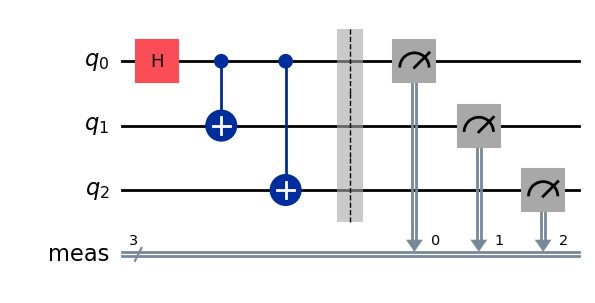

In [24]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler

ent_circ = QuantumCircuit(3)

ent_circ.h(0)
ent_circ.cx(0, 1)
ent_circ.cx(0, 2)

ent_circ.measure_all()

sampler = StatevectorSampler()

shots = 1000
job = sampler.run([ent_circ], shots=shots)
result = job.result()[0]

counts = result.data.meas.get_counts()

prob_dict = {state: c / shots for state, c in counts.items()}

print(prob_dict)

ent_circ.draw("mpl")
